# Table of Contents:

## Importing Libraries
    All the libraries are imported. 
    The functions are defined which will be required later. 
    The csv data is imported using pandas library
    
## Data Cleaning
    Data is cleaned to remove missing values. 
    Categorical data is encoded to numerical values. 
    Visualization of missing data is performed. 
    Performed label encoding and one hot encoding. 
    Final visualizaiton using heat map is done to check no missing data. 

## Exploratory Data Analysis

## Feature Selection
    Correlation plot is developed to look for most correlated features. 
    Random forest classifier is used to select the required important feature. 
    PCA and Scaling is performed to reduce the dimension of features selected. 

## Model Implementation and Hyperparameter Tuning
    The train and test dataset is separated initially for the logistic regression model. 
    First the logistic regression model is run with the training dataset and the result is generated. 
  
    Tuning of hyperparameters: C and solver is done with the Grid Search. 
    Optimal parameters are found. 
    
    The training data set is again run using the logistic regression model with new parameters and results are obtained. 
    The model is tested on testing dataset and final conclusion is made. 

## Testing and Discussion
    The train and test results are plotted on the bar plot of salary buckets. 
       


## Importing Libraries

In [1]:
# All the required libraries is imported and notebook is made ready for the code.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import warnings
#warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")
from sklearn.metrics import make_scorer, confusion_matrix
import random

The explanation of previously defined function:

1. ms_perc: This function finds the missing values in the dataframe and calculates the percentage of missingness. 
    
2. plot_learning_curve (Assignment 2 Tutorial): This function returns the learning curve plot.     


In [2]:
# Function to find missing values

''' 
Input = Dataframe
Output = missing percentage value
'''

def ms_perc(file):
    ms_ct = file.isna().sum()
    total = np.product(file.shape)
    ms_total = ms_ct.sum()
    ms_value = (ms_total/total)*100
    return ms_value


In [3]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt

Now, the dataframe is imported using pandas library. The original kaggle data is copied to another variable if used later. 

In [4]:
# Reading dataframe

kaggle_data = pd.read_csv('clean_kaggle_data_2020.csv', low_memory = False)
kaggle_original = kaggle_data.copy()
kaggle_data.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER,Q24_Encoded,Q24_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...",NaN,NaN
1,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
2,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,1.0,"10,000-19,999"
3,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,"125,000-149,9991"
4,762,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,"70,000-79,999"


## Data Cleaning

The kaggle_data is inspected by looking at column values and the missing percentage in the database. 

In [5]:
kaggle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10730 entries, 0 to 10729
Columns: 357 entries, Time from Start to Finish (seconds) to Q24_buckets
dtypes: float64(1), object(356)
memory usage: 29.2+ MB


In [6]:
kaggle_data.columns.values

array(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4',
       'Q5', 'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4',
       'Q7_Part_5', 'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9',
       'Q7_Part_10', 'Q7_Part_11', 'Q7_Part_12', 'Q7_OTHER', 'Q8',
       'Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4', 'Q9_Part_5',
       'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8', 'Q9_Part_9', 'Q9_Part_10',
       'Q9_Part_11', 'Q9_OTHER', 'Q10_Part_1', 'Q10_Part_2', 'Q10_Part_3',
       'Q10_Part_4', 'Q10_Part_5', 'Q10_Part_6', 'Q10_Part_7',
       'Q10_Part_8', 'Q10_Part_9', 'Q10_Part_10', 'Q10_Part_11',
       'Q10_Part_12', 'Q10_Part_13', 'Q10_OTHER', 'Q11', 'Q12_Part_1',
       'Q12_Part_2', 'Q12_Part_3', 'Q12_OTHER', 'Q13', 'Q14_Part_1',
       'Q14_Part_2', 'Q14_Part_3', 'Q14_Part_4', 'Q14_Part_5',
       'Q14_Part_6', 'Q14_Part_7', 'Q14_Part_8', 'Q14_Part_9',
       'Q14_Part_10', 'Q14_Part_11', 'Q14_OTHER', 'Q15', 'Q16_Part_1',
       'Q16_Part_2', 'Q16_Part_3', 

In [7]:
kaggle_data.isnull().sum()
print(ms_perc(kaggle_data))

84.33299135124693


In the kaggle dataframe, there is 84.33% data missing. 
<br>
<br>
It is seen that there are some columns with 'OTHER' option. So, it is irrelevant to keep those columns for the analysis as it does not give any specific information about the answers. These columns have free flow of text and have different key for every person. So, those columns with 'OTHER' text is dropped from the dataframe.
<br>
<br>


In [8]:
# dropping the columns with 'OTHER' as it does not make sense in the analysis. 
other_col = [t for t in kaggle_data.columns if 'OTHER' in t]
kaggle_data = kaggle_data.drop(other_col, axis = 1)
kaggle_data.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q24_Encoded,Q24_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...",NaN,NaN
1,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
2,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,1.0,"10,000-19,999"
3,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,"125,000-149,9991"
4,762,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,"70,000-79,999"


In [9]:
kaggle_data.columns.values

array(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4',
       'Q5', 'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4',
       'Q7_Part_5', 'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9',
       'Q7_Part_10', 'Q7_Part_11', 'Q7_Part_12', 'Q8', 'Q9_Part_1',
       'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4', 'Q9_Part_5', 'Q9_Part_6',
       'Q9_Part_7', 'Q9_Part_8', 'Q9_Part_9', 'Q9_Part_10', 'Q9_Part_11',
       'Q10_Part_1', 'Q10_Part_2', 'Q10_Part_3', 'Q10_Part_4',
       'Q10_Part_5', 'Q10_Part_6', 'Q10_Part_7', 'Q10_Part_8',
       'Q10_Part_9', 'Q10_Part_10', 'Q10_Part_11', 'Q10_Part_12',
       'Q10_Part_13', 'Q11', 'Q12_Part_1', 'Q12_Part_2', 'Q12_Part_3',
       'Q13', 'Q14_Part_1', 'Q14_Part_2', 'Q14_Part_3', 'Q14_Part_4',
       'Q14_Part_5', 'Q14_Part_6', 'Q14_Part_7', 'Q14_Part_8',
       'Q14_Part_9', 'Q14_Part_10', 'Q14_Part_11', 'Q15', 'Q16_Part_1',
       'Q16_Part_2', 'Q16_Part_3', 'Q16_Part_4', 'Q16_Part_5',
       'Q16_Part_6', 'Q16_Part_7', 'Q16_Pa

Also, the first row is with the questions only. So, dropping the row with the question.

In [10]:
print(kaggle_data.iloc[0])

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q35_B_Part_8                           In the next 2 years, do you hope to become mor...
Q35_B_Part_9                           In the next 2 years, do you hope to become mor...
Q35_B_Part_10                          In the next 2 years, do you hope to become mor...
Q24_Encoded                                                                          NaN
Q24_buckets                                                                          NaN
Name: 0, Length: 328,

In [11]:
kaggle_data[kaggle_data['Q24_Encoded'].isna()]

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q24_Encoded,Q24_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...",NaN,NaN


In [12]:
kaggle_data = kaggle_data.dropna(subset=['Q24_Encoded'])

In [13]:
missing_val = kaggle_data.isnull().sum().sort_values(ascending=False)
print(missing_val)

Q34_A_Part_9                           10685
Q31_A_Part_9                           10673
Q35_A_Part_4                           10672
Q31_A_Part_12                          10668
Q10_Part_6                             10665
                                       ...  
Q21                                        0
Q22                                        0
Q24                                        0
Q24_Encoded                                0
Time from Start to Finish (seconds)        0
Length: 328, dtype: int64


The above array shows the number of missing value counts according to the columns. It is still required to clean the data. 
<br>
<br>

## Visualizing the missing data

Text(0.5, 1.0, 'Missing data visualization')

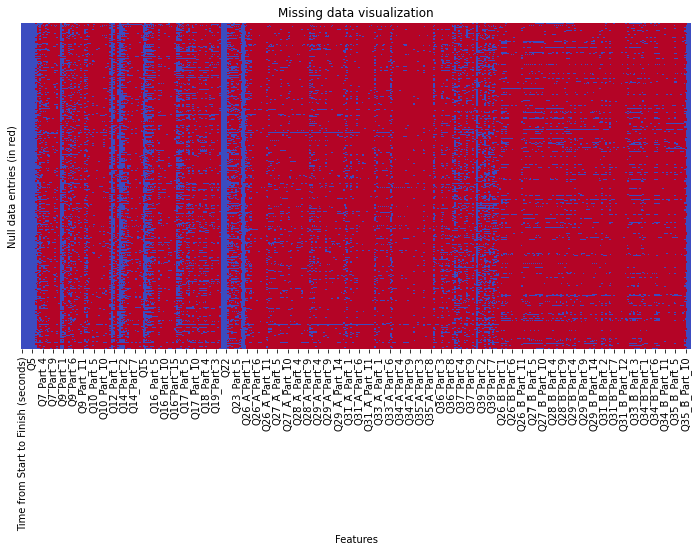

In [14]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.heatmap(kaggle_data.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)
ax.set_xlabel('Features')
ax.set_ylabel('Null data entries (in red)')
ax.set_title('Missing data visualization')

There are so many values missing and it is evident from the sns heatmap. The red color shows the missing values. 
<br>
<br>

## Inspecting all the question to sort out the irrelevant features

<br>
The following questions are irrelevant with the analysis and are dropped.
<br>

1. The first column "Time from start to finish" is irrelevant with the Salary. 
2. Q8 - What programming language you recommend to learn first - This opinion is very subjective and the Q7 already provides the reasonable question about what language you use on regular basis. 
3. Q39 - Media source on which they report data science does not have impact on salary

In [15]:
# removing those columns

Q8 = [t for t in kaggle_data.columns if 'Q8' in t]
Q39 = [t for t in kaggle_data.columns if 'Q39' in t]
drop_list = Q8 + Q39
drop_list.append('Time from Start to Finish (seconds)')
kaggle_data = kaggle_data.drop(drop_list, axis = 1)


In the dataframe, most of the questions are of categorical form having multiple choise questions and contains 'Part' in the column name. So, the columns having 'Part' in its name are one hot encoded. 
<br>
<br>
There are two ways to encode the variables: Label encoding and One hot encoding. Both are explained over here. 
<br>
<br>
**Label Encoding**: This method converts each value in the column to a number. If the value in the column repeats then that value will be replaced with the same number. If there are less variation of categorical values, then the label encoding will work best. The columns like, Age, education, profession can be label encoded very well. 
<br>
<br>
**One Hot Encoding**: A one hot encoding is a representation of categorical variables as binary vectors. This first requires that the categorical values be mapped to integer values. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.
<br>
https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/
<br>
<br>
Performing one hot encoding using the pandas get_dummies function to transform the categorical variables into the binary form. 
<br>
https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

In [16]:
cat_ques = [t for t in kaggle_data.columns if 'Part' in t]
print(cat_ques)

['Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5', 'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9', 'Q7_Part_10', 'Q7_Part_11', 'Q7_Part_12', 'Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4', 'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8', 'Q9_Part_9', 'Q9_Part_10', 'Q9_Part_11', 'Q10_Part_1', 'Q10_Part_2', 'Q10_Part_3', 'Q10_Part_4', 'Q10_Part_5', 'Q10_Part_6', 'Q10_Part_7', 'Q10_Part_8', 'Q10_Part_9', 'Q10_Part_10', 'Q10_Part_11', 'Q10_Part_12', 'Q10_Part_13', 'Q12_Part_1', 'Q12_Part_2', 'Q12_Part_3', 'Q14_Part_1', 'Q14_Part_2', 'Q14_Part_3', 'Q14_Part_4', 'Q14_Part_5', 'Q14_Part_6', 'Q14_Part_7', 'Q14_Part_8', 'Q14_Part_9', 'Q14_Part_10', 'Q14_Part_11', 'Q16_Part_1', 'Q16_Part_2', 'Q16_Part_3', 'Q16_Part_4', 'Q16_Part_5', 'Q16_Part_6', 'Q16_Part_7', 'Q16_Part_8', 'Q16_Part_9', 'Q16_Part_10', 'Q16_Part_11', 'Q16_Part_12', 'Q16_Part_13', 'Q16_Part_14', 'Q16_Part_15', 'Q17_Part_1', 'Q17_Part_2', 'Q17_Part_3', 'Q17_Part_4', 'Q17_Part_5', 'Q17_Part_6', 'Q17_Part_7

In [17]:
cat_encoded = pd.get_dummies(kaggle_data, columns=cat_ques)
cat_encoded

,Q1,Q2,Q3,Q4,Q5,Q6,Q11,Q13,Q15,Q20,...,Q35_B_Part_1_ Neptune.ai,Q35_B_Part_2_ Weights & Biases,Q35_B_Part_3_ Comet.ml,Q35_B_Part_4_ Sacred + Omniboard,Q35_B_Part_5_ TensorBoard,Q35_B_Part_6_ Guild.ai,Q35_B_Part_7_ Polyaxon,Q35_B_Part_8_ Trains,Q35_B_Part_9_ Domino Model Monitor,Q35_B_Part_10_None
1,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,A personal computer or laptop,2-5 times,1-2 years,"10,000 or more employees",...,0,0,0,0,0,0,0,0,0,0
2,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,A personal computer or laptop,Never,I do not use machine learning methods,"1000-9,999 employees",...,0,0,0,0,0,0,0,0,0,1
3,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,"A cloud computing platform (AWS, Azure, GCP, h...",2-5 times,3-4 years,250-999 employees,...,0,0,0,0,0,0,0,0,0,0
4,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,"A cloud computing platform (AWS, Azure, GCP, h...",2-5 times,2-3 years,"1000-9,999 employees",...,0,0,0,0,0,0,0,0,0,0
5,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,A personal computer or laptop,Never,Under 1 year,0-49 employees,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,35-39,Man,Malaysia,I prefer not to answer,Machine Learning Engineer,1-2 years,A personal computer or laptop,Never,1-2 years,0-49 employees,...,0,0,0,0,1,0,0,1,0,0
10726,35-39,Man,Thailand,Bachelor’s degree,Other,10-20 years,A personal computer or laptop,Never,I do not use machine learning methods,250-999 employees,...,0,0,0,0,0,0,0,0,0,1
10727,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,A personal computer or laptop,Never,I do not use machine learning methods,0-49 employees,...,0,0,0,0,0,0,0,0,0,0
10728,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,"A cloud computing platform (AWS, Azure, GCP, h...",More than 25 times,1-2 years,"10,000 or more employees",...,1,1,0,0,1,0,0,1,0,0


In [18]:
print(ms_perc(cat_encoded))

0.5782281222676413


It is observed that only 0.57% data is missing from the dataframe. As most of the columns contain 'Part' and those all are one hot encoded, the missing value percentage reduces less than one. 

In [19]:
missing_val = cat_encoded.isnull().sum().sort_values(ascending=False)
print(missing_val[0:20])

Q32                                                                                                                            9231
Q30                                                                                                                            7216
Q38                                                                                                                            1253
Q11                                                                                                                             561
Q13                                                                                                                             561
Q15                                                                                                                             561
Q25                                                                                                                             159
Q35_B_Part_10_None                                                          

Moreover, the column with the None entity (i.e, that includes the 'None') answer are also dropped to clean out the data. 

In [20]:
none_col = [t for t in cat_encoded.columns if 'None' in t]
kaggle_encoded = cat_encoded.drop(none_col, axis=1)
kaggle_encoded

,Q1,Q2,Q3,Q4,Q5,Q6,Q11,Q13,Q15,Q20,...,Q34_B_Part_10_ MLbox,Q35_B_Part_1_ Neptune.ai,Q35_B_Part_2_ Weights & Biases,Q35_B_Part_3_ Comet.ml,Q35_B_Part_4_ Sacred + Omniboard,Q35_B_Part_5_ TensorBoard,Q35_B_Part_6_ Guild.ai,Q35_B_Part_7_ Polyaxon,Q35_B_Part_8_ Trains,Q35_B_Part_9_ Domino Model Monitor
1,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,A personal computer or laptop,2-5 times,1-2 years,"10,000 or more employees",...,0,0,0,0,0,0,0,0,0,0
2,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,A personal computer or laptop,Never,I do not use machine learning methods,"1000-9,999 employees",...,0,0,0,0,0,0,0,0,0,0
3,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,"A cloud computing platform (AWS, Azure, GCP, h...",2-5 times,3-4 years,250-999 employees,...,0,0,0,0,0,0,0,0,0,0
4,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,"A cloud computing platform (AWS, Azure, GCP, h...",2-5 times,2-3 years,"1000-9,999 employees",...,0,0,0,0,0,0,0,0,0,0
5,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,A personal computer or laptop,Never,Under 1 year,0-49 employees,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,35-39,Man,Malaysia,I prefer not to answer,Machine Learning Engineer,1-2 years,A personal computer or laptop,Never,1-2 years,0-49 employees,...,0,0,0,0,0,1,0,0,1,0
10726,35-39,Man,Thailand,Bachelor’s degree,Other,10-20 years,A personal computer or laptop,Never,I do not use machine learning methods,250-999 employees,...,0,0,0,0,0,0,0,0,0,0
10727,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,A personal computer or laptop,Never,I do not use machine learning methods,0-49 employees,...,0,0,0,0,0,0,0,0,0,0
10728,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,"A cloud computing platform (AWS, Azure, GCP, h...",More than 25 times,1-2 years,"10,000 or more employees",...,1,1,1,0,0,1,0,0,1,0


In [21]:
missing_val = kaggle_encoded.isnull().sum().sort_values(ascending=False)
print(missing_val[0:20])

Q32                                                                                                                            9231
Q30                                                                                                                            7216
Q38                                                                                                                            1253
Q11                                                                                                                             561
Q13                                                                                                                             561
Q15                                                                                                                             561
Q25                                                                                                                             159
Q35_B_Part_9_ Domino Model Monitor                                          

In [22]:
x,y = kaggle_encoded.shape
print('percentage missingness of column Q32 is ', (missing_val['Q32']/x)*100)
print('percentage missingness of column Q30 is ', (missing_val['Q30']/x)*100)
print('percentage missingness of column Q38 is ', (missing_val['Q38']/x)*100)
print('percentage missingness of column Q11 is ', (missing_val['Q11']/x)*100)
print('percentage missingness of column Q13 is ', (missing_val['Q13']/x)*100)
print('percentage missingness of column Q15 is ', (missing_val['Q15']/x)*100)
print('percentage missingness of column Q25 is ', (missing_val['Q25']/x)*100)

percentage missingness of column Q32 is  86.03784136452605
percentage missingness of column Q30 is  67.25696709851803
percentage missingness of column Q38 is  11.678628017522602
percentage missingness of column Q11 is  5.22881908845186
percentage missingness of column Q13 is  5.22881908845186
percentage missingness of column Q15 is  5.22881908845186
percentage missingness of column Q25 is  1.4819647683847517


The columns 'Q32', 'Q30', 'Q38', 'Q11', 'Q13', 'Q15', 'Q25' have the missing values and need to be analysed. 
The columns 'Q32' and 'Q30' have more than 50% missing values and so they are dropped. 
The rest of the columns are imputed with the mean or median as required.

In [23]:
kaggle_encoded = kaggle_encoded.drop(['Q32', 'Q30'], axis=1)
kaggle_encoded.isnull().sum().sort_values(ascending=False)

Q38                                    1253
Q11                                     561
Q13                                     561
Q15                                     561
Q25                                     159
                                       ... 
Q36_Part_1_ Plotly Dash                   0
Q35_A_Part_9_ Domino Model Monitor        0
Q35_A_Part_8_ Trains                      0
Q35_A_Part_7_ Polyaxon                    0
Q1                                        0
Length: 286, dtype: int64

In [24]:
kaggle_original[['Q11','Q13','Q15','Q25','Q38']]

,Q11,Q13,Q15,Q25,Q38
0,What type of computing platform do you use mos...,Approximately how many times have you used a T...,For how many years have you used machine learn...,Approximately how much money have you (or your...,What is the primary tool that you use at work ...
1,A personal computer or laptop,2-5 times,1-2 years,"$100,000 or more ($USD)","Business intelligence software (Salesforce, Ta..."
2,A personal computer or laptop,Never,I do not use machine learning methods,$0 ($USD),"Basic statistical software (Microsoft Excel, G..."
3,"A cloud computing platform (AWS, Azure, GCP, h...",2-5 times,3-4 years,"$10,000-$99,999","Local development environments (RStudio, Jupyt..."
4,"A cloud computing platform (AWS, Azure, GCP, h...",2-5 times,2-3 years,"$10,000-$99,999","Cloud-based data software & APIs (AWS, GCP, Az..."
...,...,...,...,...,...
10725,A personal computer or laptop,Never,1-2 years,$0 ($USD),"Basic statistical software (Microsoft Excel, G..."
10726,A personal computer or laptop,Never,I do not use machine learning methods,$0 ($USD),"Local development environments (RStudio, Jupyt..."
10727,A personal computer or laptop,Never,I do not use machine learning methods,$0 ($USD),NaN
10728,"A cloud computing platform (AWS, Azure, GCP, h...",More than 25 times,1-2 years,$0 ($USD),"Local development environments (RStudio, Jupyt..."


Text(0.5, 1.0, 'Q13')

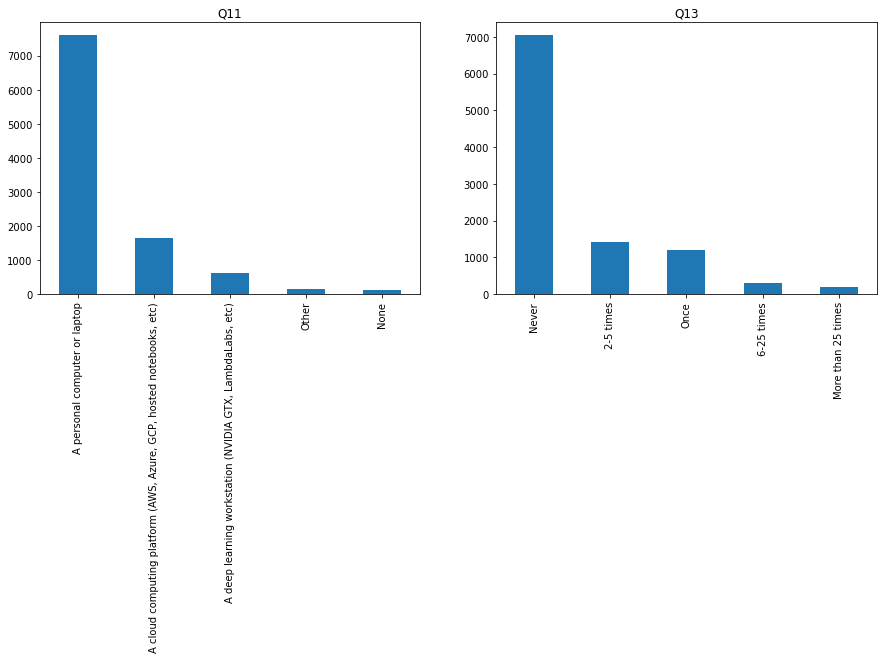

In [25]:
q11 = kaggle_encoded['Q11'].value_counts()
q13 = kaggle_encoded['Q13'].value_counts()
q15 = kaggle_encoded['Q15'].value_counts()
q25 = kaggle_encoded['Q25'].value_counts()
q38 = kaggle_encoded['Q38'].value_counts()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
q11.plot.bar()
plt.title('Q11')

plt.subplot(1,2,2)
q13.plot.bar()
plt.title('Q13')


Text(0.5, 1.0, 'Q38')

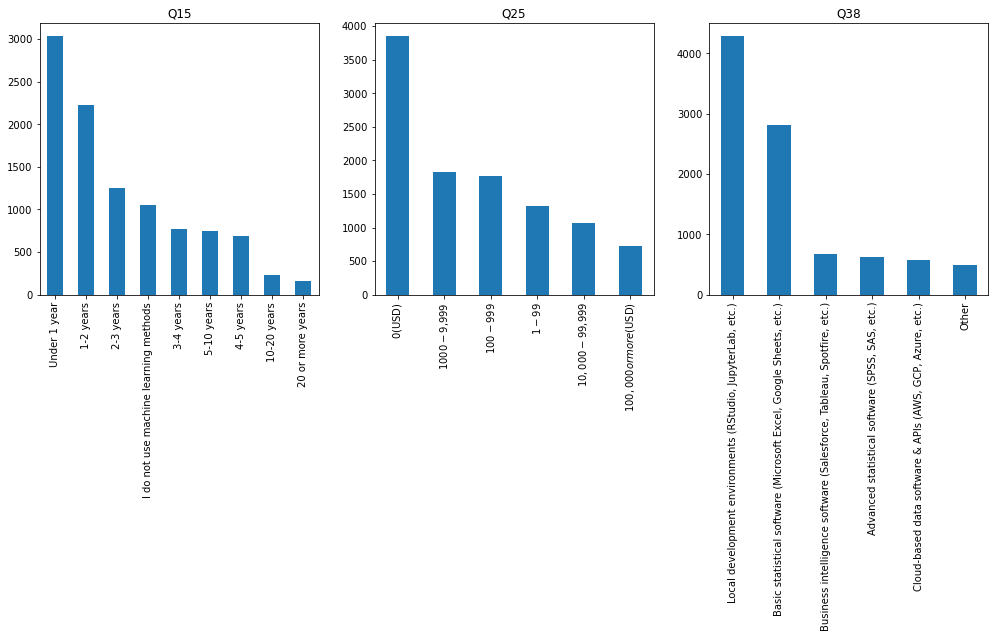

In [26]:
plt.figure(figsize=(17,5))

plt.subplot(1,3,1)
q15.plot.bar()
plt.title('Q15')

plt.subplot(1,3,2)
q25.plot.bar()
plt.title('Q25')

plt.subplot(1,3,3)
q38.plot.bar()
plt.title('Q38')

All the plots are skewed. So, to use mean for imputation does not seems reasonable. 
Therefore, the mode is used to impute all the columns. 

In [27]:
def kag_mode(df):
    df.fillna(df.mode()[0],inplace=True)
kag_mode(kaggle_encoded['Q11'])
kag_mode(kaggle_encoded['Q13'])
kag_mode(kaggle_encoded['Q15'])
kag_mode(kaggle_encoded['Q25'])
kag_mode(kaggle_encoded['Q38'])

In [28]:
kaggle_encoded.isnull().sum().sort_values(ascending=False)

Q35_B_Part_9_ Domino Model Monitor                                               0
Q23_Part_3_Build prototypes to explore applying machine learning to new areas    0
Q19_Part_1_Word embeddings/vectors (GLoVe, fastText, word2vec)                   0
Q19_Part_2_Encoder-decorder models (seq2seq, vanilla transformers)               0
Q19_Part_3_Contextualized embeddings (ELMo, CoVe)                                0
                                                                                ..
Q36_Part_1_ Plotly Dash                                                          0
Q35_A_Part_9_ Domino Model Monitor                                               0
Q35_A_Part_8_ Trains                                                             0
Q35_A_Part_7_ Polyaxon                                                           0
Q1                                                                               0
Length: 286, dtype: int64

In [29]:
ms_perc(kaggle_encoded)

0.0

In [30]:
kaggle_encoded

,Q1,Q2,Q3,Q4,Q5,Q6,Q11,Q13,Q15,Q20,...,Q34_B_Part_10_ MLbox,Q35_B_Part_1_ Neptune.ai,Q35_B_Part_2_ Weights & Biases,Q35_B_Part_3_ Comet.ml,Q35_B_Part_4_ Sacred + Omniboard,Q35_B_Part_5_ TensorBoard,Q35_B_Part_6_ Guild.ai,Q35_B_Part_7_ Polyaxon,Q35_B_Part_8_ Trains,Q35_B_Part_9_ Domino Model Monitor
1,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,A personal computer or laptop,2-5 times,1-2 years,"10,000 or more employees",...,0,0,0,0,0,0,0,0,0,0
2,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,A personal computer or laptop,Never,I do not use machine learning methods,"1000-9,999 employees",...,0,0,0,0,0,0,0,0,0,0
3,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,"A cloud computing platform (AWS, Azure, GCP, h...",2-5 times,3-4 years,250-999 employees,...,0,0,0,0,0,0,0,0,0,0
4,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,"A cloud computing platform (AWS, Azure, GCP, h...",2-5 times,2-3 years,"1000-9,999 employees",...,0,0,0,0,0,0,0,0,0,0
5,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,A personal computer or laptop,Never,Under 1 year,0-49 employees,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,35-39,Man,Malaysia,I prefer not to answer,Machine Learning Engineer,1-2 years,A personal computer or laptop,Never,1-2 years,0-49 employees,...,0,0,0,0,0,1,0,0,1,0
10726,35-39,Man,Thailand,Bachelor’s degree,Other,10-20 years,A personal computer or laptop,Never,I do not use machine learning methods,250-999 employees,...,0,0,0,0,0,0,0,0,0,0
10727,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,A personal computer or laptop,Never,I do not use machine learning methods,0-49 employees,...,0,0,0,0,0,0,0,0,0,0
10728,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,"A cloud computing platform (AWS, Azure, GCP, h...",More than 25 times,1-2 years,"10,000 or more employees",...,1,1,1,0,0,1,0,0,1,0


The dataframe is reduced to 10729 rows and 313 columns. 
The heat map is generated to visualize the missing data. 

Text(0.5, 1.0, 'Missing data visualization')

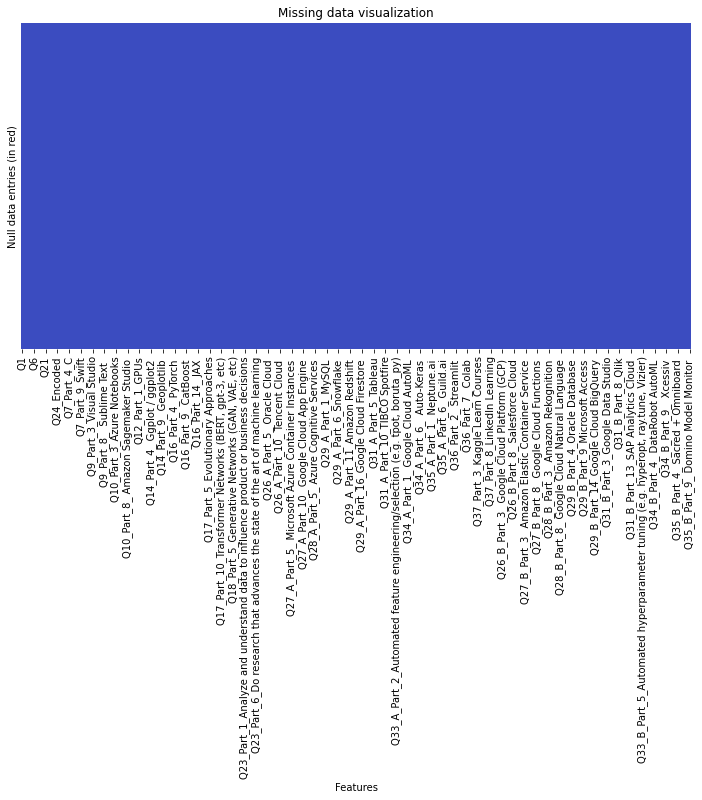

In [31]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.heatmap(kaggle_encoded.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)
ax.set_xlabel('Features')
ax.set_ylabel('Null data entries (in red)')
ax.set_title('Missing data visualization')

## Exploratory Data Analysis

For the analysis of the dataframe, following things were analysed. 
1. The distribution of Age, Gender, Education and Profession using the bar plot
2. Age and Gender distribution bar plot
3. Salary distribution according to Education
4. Salary distribution according to profession
5. Salary distribution according to years of coding experience
6. Salary distribution according to the money they spent on coding Q25

      Age  total_count
7   18-21          498
3   22-24         1424
0   25-29         2350
1   30-34         1979
2   35-39         1467
4   40-44         1042
5   45-49          771
6   50-54          536
9   55-59          301
8   60-69          309
10    70+           52
                    Gender  total_count
0                      Man         8872
4                Nonbinary           20
2        Prefer not to say          131
3  Prefer to self-describe           23
1                    Woman         1683
                                                 Edu  total_count
1                                  Bachelor’s degree         3013
2                                    Doctoral degree         1718
5                             I prefer not to answer          158
0                                    Master’s degree         4879
6               No formal education past high school          106
3                                Professional degree          470
4  Some college/univer

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

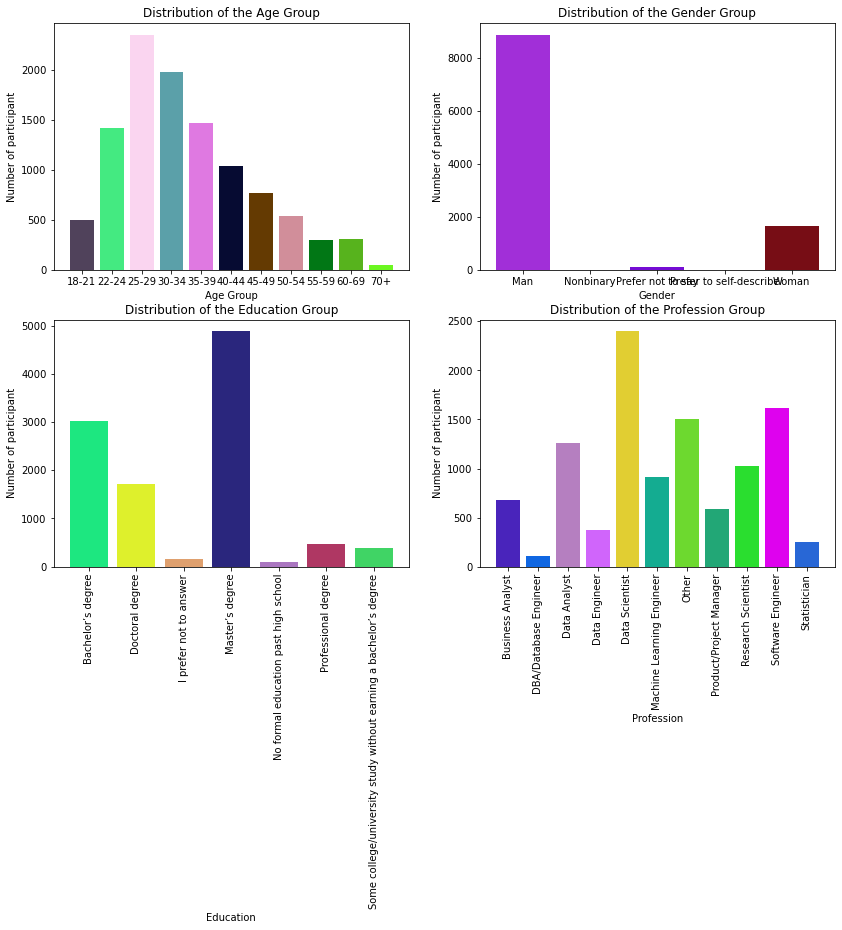

In [32]:
plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
count = kaggle_encoded["Q1"].value_counts()
Age_count = pd.DataFrame({"Age":count.index, "total_count":count.values})
Age_count = Age_count.sort_values("Age")
print(Age_count)
plt.bar(Age_count.Age, Age_count.total_count, color=np.random.rand(11,3))
plt.xlabel('Age Group')
plt.ylabel('Number of participant')
plt.title('Distribution of the Age Group')

plt.subplot(2,2,2)
count = kaggle_encoded["Q2"].value_counts()
Gender_count = pd.DataFrame({"Gender":count.index, "total_count":count.values})
Gender_count = Gender_count.sort_values("Gender")
print(Gender_count)
plt.bar(Gender_count.Gender, Gender_count.total_count, color=np.random.rand(11,3))
plt.xlabel('Gender')
plt.ylabel('Number of participant')
plt.title('Distribution of the Gender Group')

plt.subplot(2,2,3)
count = kaggle_encoded["Q4"].value_counts()
Edu_count = pd.DataFrame({"Edu":count.index, "total_count":count.values})
Edu_count = Edu_count.sort_values("Edu")
print(Edu_count)
plt.bar(Edu_count.Edu, Edu_count.total_count, color=np.random.rand(11,3))
plt.xlabel('Education')
plt.ylabel('Number of participant')
plt.title('Distribution of the Education Group')
plt.xticks(rotation=90)

plt.subplot(2,2,4)
count = kaggle_encoded["Q5"].value_counts()
Prof_count = pd.DataFrame({"Profession":count.index, "total_count":count.values})
Prof_count = Prof_count.sort_values("Profession")
print(Prof_count)
plt.bar(Prof_count.Profession, Prof_count.total_count, color=np.random.rand(11,3))
plt.xlabel('Profession')
plt.ylabel('Number of participant')
plt.title('Distribution of the Profession Group')
plt.xticks(rotation=90)


The above EDA shows that the Man who accomplished Master's degree, having profession of Data Scientist among the age group of 25-29 are most of the survey respondants. 

Text(0, 0.5, 'Frequency')

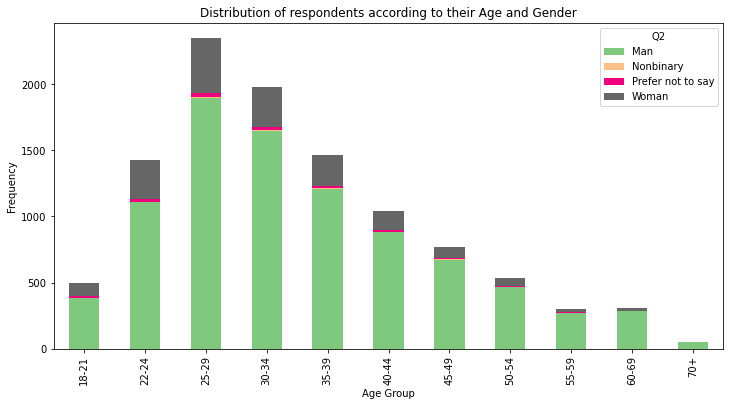

In [33]:
kaggle_encoded['Q2'] = kaggle_encoded['Q2'].replace('Prefer to self-describe', 'Prefer not to say')
df1 = kaggle_encoded[['Q1','Q2']]
df1['ct'] = 1
df1 = pd.pivot_table(df1, values = 'ct', index = 'Q1', columns = 'Q2', aggfunc = np.sum, fill_value =0)
ax = df1.plot.bar(stacked=True, figsize = (12,6), colormap='Accent')
ax.set_title('Distribution of respondents according to their Age and Gender')
ax.set_xlabel('Age Group')
ax.set_ylabel('Frequency')

**Observation**: The age group between 20 to 40 years are most of the survey respondants and those are mostly Man.

[Text(0, 0, 'Master’s degree'),
 Text(1, 0, 'Bachelor’s degree'),
 Text(2, 0, 'Doctoral degree'),
 Text(3, 0, 'Some college/university study without earning a bachelor’s degree'),
 Text(4, 0, 'Professional degree'),
 Text(5, 0, 'I prefer not to answer'),
 Text(6, 0, 'No formal education past high school')]

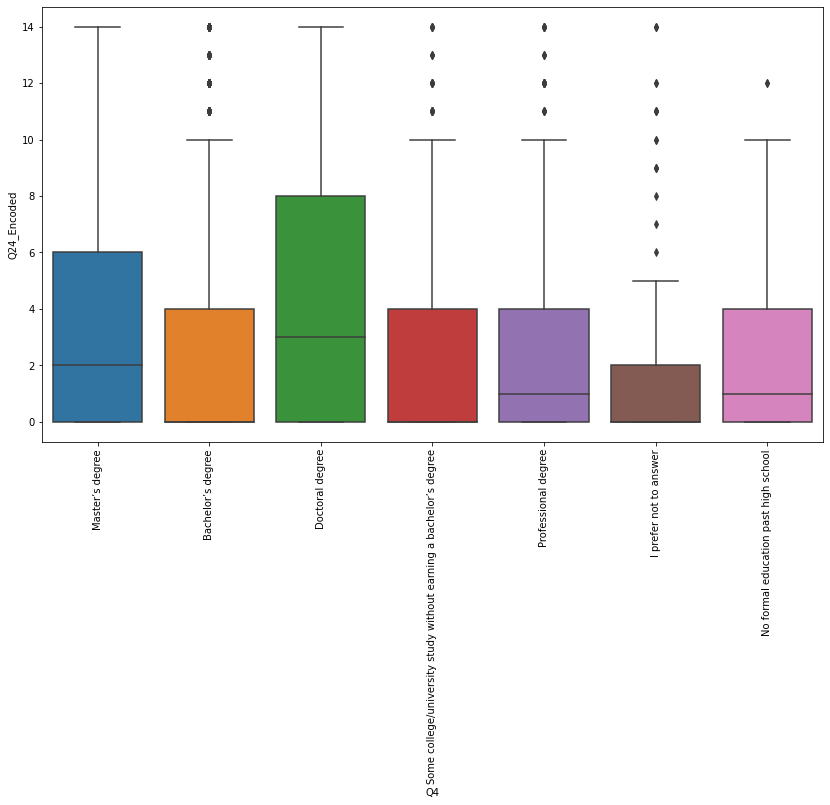

In [34]:
plt.figure(figsize=(14,8))
edu_sal = sns.boxplot(x='Q4', y='Q24_Encoded', data = kaggle_encoded)
edu_sal.set_xticklabels(edu_sal.get_xticklabels(), rotation=90)

**Observation**: Higher the education level, higher the salary. Doctoral candidates have higher mean than all other. 

[Text(0, 0, 'Data Engineer'),
 Text(1, 0, 'Software Engineer'),
 Text(2, 0, 'Data Scientist'),
 Text(3, 0, 'Research Scientist'),
 Text(4, 0, 'Other'),
 Text(5, 0, 'Statistician'),
 Text(6, 0, 'Product/Project Manager'),
 Text(7, 0, 'Data Analyst'),
 Text(8, 0, 'Machine Learning Engineer'),
 Text(9, 0, 'Business Analyst'),
 Text(10, 0, 'DBA/Database Engineer')]

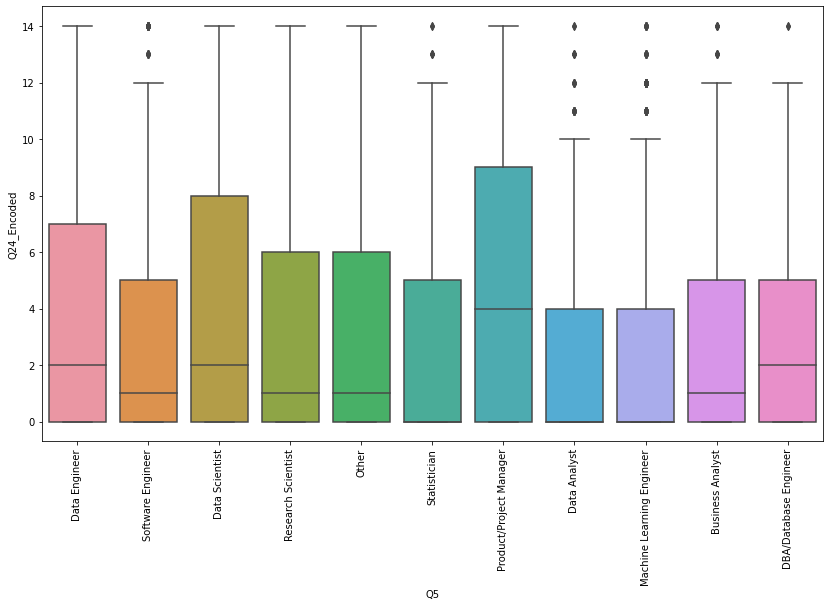

In [35]:
plt.figure(figsize=(14,8))
edu_sal = sns.boxplot(x='Q5', y='Q24_Encoded', data = kaggle_encoded)
edu_sal.set_xticklabels(edu_sal.get_xticklabels(), rotation=90)

**Observation**: The profession of Product Manager has higher mean salary than all other. Then, comes the data engineer and data scientist. 

[Text(0, 0, '5-10 years'),
 Text(1, 0, '10-20 years'),
 Text(2, 0, '1-2 years'),
 Text(3, 0, '< 1 years'),
 Text(4, 0, '3-5 years'),
 Text(5, 0, '20+ years'),
 Text(6, 0, 'I have never written code')]

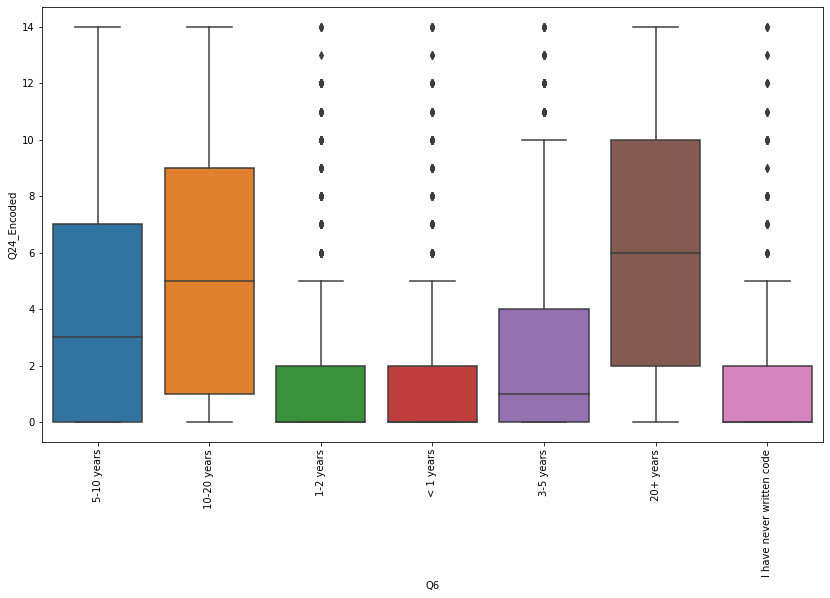

In [36]:
plt.figure(figsize=(14,8))
edu_sal = sns.boxplot(x='Q6', y='Q24_Encoded', data = kaggle_encoded)
edu_sal.set_xticklabels(edu_sal.get_xticklabels(), rotation=90)

**Observation**: The salary is directly related to the experience. The person having 10-20 years or more than 20 years of experience earn more than others.

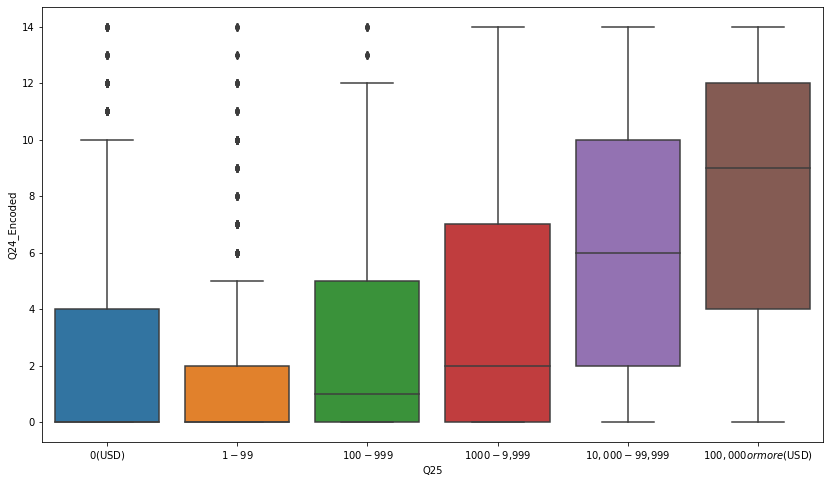

In [37]:
plt.figure(figsize=(14,8))
edu_sal = sns.boxplot(x='Q25', y='Q24_Encoded', data = kaggle_encoded, order = ['$0 ($USD)', '$1-$99', '$100-$999', 
                                                                                '$1000-$9,999', '$10,000-$99,999', 
                                                                                '$100,000 or more ($USD)'])

**Observation**: Here, the salary is also directly related to the money spent on the coding. So, more the investement made, more the chances of earning is there. 

## Feature Selection

There are around 286 column features in which most feature may not be related to the salary earned. So, the feature selection is an important step in classification data science problems. 
<br>
<br>
Before that, the categorical values are there in the dataframe which is required to be converted into the numerical values. 
<br>
Analysing the remaining categorical variables and converting them to numerical values by one hot encoding. 

In [38]:
cat_col = kaggle_encoded.select_dtypes(include=['object']).columns
kaggle_encoded[cat_col].head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q11,Q13,Q15,Q20,Q21,Q22,Q24,Q25,Q38,Q24_buckets
1,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,A personal computer or laptop,2-5 times,1-2 years,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...","100,000-124,999","$100,000 or more ($USD)","Business intelligence software (Salesforce, Ta...","100,000-124,999"
2,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,A personal computer or laptop,Never,I do not use machine learning methods,"1000-9,999 employees",0,No (we do not use ML methods),"15,000-19,999",$0 ($USD),"Basic statistical software (Microsoft Excel, G...","10,000-19,999"
3,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,"A cloud computing platform (AWS, Azure, GCP, h...",2-5 times,3-4 years,250-999 employees,5-9,"We have well established ML methods (i.e., mod...","125,000-149,999","$10,000-$99,999","Local development environments (RStudio, Jupyt...","125,000-149,9991"
4,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,"A cloud computing platform (AWS, Azure, GCP, h...",2-5 times,2-3 years,"1000-9,999 employees",20+,"We have well established ML methods (i.e., mod...","70,000-79,999","$10,000-$99,999","Cloud-based data software & APIs (AWS, GCP, Az...","70,000-79,999"
5,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,A personal computer or laptop,Never,Under 1 year,0-49 employees,1-2,We use ML methods for generating insights (but...,"30,000-39,999",$1-$99,"Local development environments (RStudio, Jupyt...","30,000-39,999"


In [39]:
#removing Q24 and Q24_buckets as we already have Q4_encoded and saving the new dataframe with another name. 
kaggle_new = kaggle_encoded.drop(['Q24','Q24_buckets'], axis=1)
kaggle_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10729 entries, 1 to 10729
Columns: 284 entries, Q1 to Q35_B_Part_9_ Domino Model Monitor 
dtypes: float64(1), object(14), uint8(269)
memory usage: 4.4+ MB


In [40]:
cat_col = kaggle_new.select_dtypes(include=['object']).columns
kaggle_new[cat_col].head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q11,Q13,Q15,Q20,Q21,Q22,Q25,Q38
1,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,A personal computer or laptop,2-5 times,1-2 years,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...","$100,000 or more ($USD)","Business intelligence software (Salesforce, Ta..."
2,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,A personal computer or laptop,Never,I do not use machine learning methods,"1000-9,999 employees",0,No (we do not use ML methods),$0 ($USD),"Basic statistical software (Microsoft Excel, G..."
3,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,"A cloud computing platform (AWS, Azure, GCP, h...",2-5 times,3-4 years,250-999 employees,5-9,"We have well established ML methods (i.e., mod...","$10,000-$99,999","Local development environments (RStudio, Jupyt..."
4,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,"A cloud computing platform (AWS, Azure, GCP, h...",2-5 times,2-3 years,"1000-9,999 employees",20+,"We have well established ML methods (i.e., mod...","$10,000-$99,999","Cloud-based data software & APIs (AWS, GCP, Az..."
5,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,A personal computer or laptop,Never,Under 1 year,0-49 employees,1-2,We use ML methods for generating insights (but...,$1-$99,"Local development environments (RStudio, Jupyt..."


Here, Q1, Q6, Q13, Q15, Q20, Q21, Q25 includes some bucket of values which can be mapped to the specific integer. So, those column can be label encoded (as it works for ordinal data). Those column have some sort of order. 

In [41]:
# Encoding the ordinal data
# Here the ordinal columns are Q1, Q6, Q13, Q15, Q20, Q21, Q25
# So label encoding the given columns using the method shown in Tutorial. 

# Q1
kaggle_new['Q1'].unique()

# Q6
kaggle_new['Q6'].unique()

# Q13
kaggle_new['Q13'].unique()

# Q15
kaggle_new['Q15'].unique()

# Q20
kaggle_new['Q20'].unique()

# Q21
kaggle_new['Q21'].unique()

# Q25
kaggle_new['Q25'].unique()

array(['$100,000 or more ($USD)', '$0 ($USD)', '$10,000-$99,999',
       '$1-$99', '$1000-$9,999', '$100-$999'], dtype=object)

In [42]:
# Q1
kaggle_new['Q1'] = kaggle_new['Q1'].map({'18-21':0, '22-24':1, '25-29':2, '30-34':3, '35-39':4, '40-44':5, 
                                        '45-49':6, '50-54':7, '55-59':8, '60-69':9, '70+':10})
kaggle_new['Q1'] = kaggle_new['Q1'].astype(int)

# Q6
kaggle_new['Q6'] = kaggle_new['Q6'].map({'< 1 years':0, '1-2 years':1, '3-5 years':2, '5-10 years':3, 
                                         '10-20 years':4, '20+ years':5, 
                                        'I have never written code':6})
kaggle_new['Q6'] = kaggle_new['Q6'].astype(int)

# Q13
kaggle_new['Q13'] = kaggle_new['Q13'].map({'Never':0, 'Once':1, '2-5 times':2, '6-25 times':3, 
                                         'More than 25 times':4})
kaggle_new['Q13'] = kaggle_new['Q13'].astype(int)

# Q15
kaggle_new['Q15'] = kaggle_new['Q15'].map({'I do not use machine learning methods':0, 'Under 1 year':1, '1-2 years':2, 
                                           '2-3 years':3, '3-4 years':4, '4-5 years':5, '5-10 years':6, 
                                           '10-20 years':7, '20 or more years':8})
kaggle_new['Q15'] = kaggle_new['Q15'].astype(int)

# Q20
kaggle_new['Q20'] = kaggle_new['Q20'].map({'0-49 employees':0, '50-249 employees':1, '250-999 employees':2, 
                                           '1000-9,999 employees':3, '10,000 or more employees':4})
kaggle_new['Q20'] = kaggle_new['Q20'].astype(int)

# Q21
kaggle_new['Q21'] = kaggle_new['Q21'].map({'0':0, '1-2':1, '3-4':2, '5-9':3, '10-14':4, '15-19':5, '20+':6})
kaggle_new['Q21'] = kaggle_new['Q21'].astype(int)

# Q25
kaggle_new['Q25'] = kaggle_new['Q25'].map({'$0 ($USD)':0, '$1-$99':1, '$100-$999':2, '$1000-$9,999':3, 
                                           '$10,000-$99,999':4, '$100,000 or more ($USD)':5})
kaggle_new['Q25'] = kaggle_new['Q25'].astype(int)


Now, the rest columns are nominal data columns. So, those are one hot encoded except the column of Q3. 
<br>
<br>
The Q3 includes the name of countries and it is analysed by grouping and then one hot encoding as shown later. 

In [43]:
cat_col = kaggle_new.select_dtypes(include=['object']).columns
cat_col = cat_col.drop('Q3')
print(cat_col)
kaggle_new[cat_col].head()


Index(['Q2', 'Q4', 'Q5', 'Q11', 'Q22', 'Q38'], dtype='object')


,Q2,Q4,Q5,Q11,Q22,Q38
1,Man,Master’s degree,Data Engineer,A personal computer or laptop,"We have well established ML methods (i.e., mod...","Business intelligence software (Salesforce, Ta..."
2,Man,Bachelor’s degree,Software Engineer,A personal computer or laptop,No (we do not use ML methods),"Basic statistical software (Microsoft Excel, G..."
3,Man,Master’s degree,Data Scientist,"A cloud computing platform (AWS, Azure, GCP, h...","We have well established ML methods (i.e., mod...","Local development environments (RStudio, Jupyt..."
4,Man,Doctoral degree,Data Scientist,"A cloud computing platform (AWS, Azure, GCP, h...","We have well established ML methods (i.e., mod...","Cloud-based data software & APIs (AWS, GCP, Az..."
5,Man,Doctoral degree,Research Scientist,A personal computer or laptop,We use ML methods for generating insights (but...,"Local development environments (RStudio, Jupyt..."


In [44]:
kaggle_df = pd.get_dummies(kaggle_new, columns=cat_col)
kaggle_df

,Q1,Q3,Q6,Q13,Q15,Q20,Q21,Q25,Q24_Encoded,Q7_Part_1_Python,...,Q22_We are exploring ML methods (and may one day put a model into production),"Q22_We have well established ML methods (i.e., models in production for more than 2 years)","Q22_We recently started using ML methods (i.e., models in production for less than 2 years)",Q22_We use ML methods for generating insights (but do not put working models into production),"Q38_Advanced statistical software (SPSS, SAS, etc.)","Q38_Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Q38_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Q38_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Q38_Local development environments (RStudio, JupyterLab, etc.)",Q38_Other
1,3,United States of America,3,2,2,4,6,5,10.0,1,...,0,1,0,0,0,0,1,0,0,0
2,4,Argentina,4,0,0,3,0,0,1.0,0,...,0,0,0,0,0,1,0,0,0,0
3,3,United States of America,3,2,4,2,3,4,11.0,1,...,0,1,0,0,0,0,0,0,1,0
4,4,Germany,3,2,3,3,6,4,7.0,1,...,0,1,0,0,0,0,0,1,0,0
5,4,United States of America,1,0,1,0,1,1,3.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,4,Malaysia,1,0,2,0,3,0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
10726,4,Thailand,4,0,0,2,0,0,1.0,0,...,0,0,0,0,0,0,0,0,1,0
10727,3,Brazil,0,0,0,0,0,0,0.0,1,...,1,0,0,0,0,0,0,0,1,0
10728,1,India,2,4,2,4,6,0,0.0,1,...,0,0,1,0,0,0,0,0,1,0


In [45]:
cat_col = kaggle_df.select_dtypes(include=['object']).columns
print(cat_col)

Index(['Q3'], dtype='object')


The countries in Q3 are grouped into three sections, i.e. C1, C2, and C3. There are around 54 countries and it is sort in order according to their count. The first highest number of 18 countries are grouped in C1. The next 18 highest count countries are grouped in C2. The last 18 least included countries are grouped in C3. 
<br>
So, there are now three groups C1, C2, and C3 instead of 54 countries in column Q3. 

In [46]:
countries = kaggle_df.Q3
Ct_count = countries.value_counts()
Country = pd.DataFrame({"Country":Ct_count.index, "count":Ct_count.values})
C1 = Country[0:19]
C2 = Country[19:37]
C3 = Country[37:55]

In [47]:
kaggle_df = kaggle_df.replace(C1.Country.values, 'C1')
kaggle_df = kaggle_df.replace(C2.Country.values, 'C2')
kaggle_df = kaggle_df.replace(C3.Country.values, 'C3')
kaggle_df

,Q1,Q3,Q6,Q13,Q15,Q20,Q21,Q25,Q24_Encoded,Q7_Part_1_Python,...,Q22_We are exploring ML methods (and may one day put a model into production),"Q22_We have well established ML methods (i.e., models in production for more than 2 years)","Q22_We recently started using ML methods (i.e., models in production for less than 2 years)",Q22_We use ML methods for generating insights (but do not put working models into production),"Q38_Advanced statistical software (SPSS, SAS, etc.)","Q38_Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Q38_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Q38_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Q38_Local development environments (RStudio, JupyterLab, etc.)",Q38_Other
1,3,C1,3,2,2,4,6,5,10.0,1,...,0,1,0,0,0,0,1,0,0,0
2,4,C2,4,0,0,3,0,0,1.0,0,...,0,0,0,0,0,1,0,0,0,0
3,3,C1,3,2,4,2,3,4,11.0,1,...,0,1,0,0,0,0,0,0,1,0
4,4,C1,3,2,3,3,6,4,7.0,1,...,0,1,0,0,0,0,0,1,0,0
5,4,C1,1,0,1,0,1,1,3.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,4,C3,1,0,2,0,3,0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
10726,4,C2,4,0,0,2,0,0,1.0,0,...,0,0,0,0,0,0,0,0,1,0
10727,3,C1,0,0,0,0,0,0,0.0,1,...,1,0,0,0,0,0,0,0,1,0
10728,1,C1,2,4,2,4,6,0,0.0,1,...,0,0,1,0,0,0,0,0,1,0


Now, the Q3 column is one hot encoded using pandas get_dummies function. So, there will be three new columns Q3_C1, Q3_C2, and Q3_C3 instead of column Q3. 

In [48]:
kaggle_df = pd.get_dummies(kaggle_df, columns=['Q3'])
kaggle_df

,Q1,Q6,Q13,Q15,Q20,Q21,Q25,Q24_Encoded,Q7_Part_1_Python,Q7_Part_2_R,...,Q22_We use ML methods for generating insights (but do not put working models into production),"Q38_Advanced statistical software (SPSS, SAS, etc.)","Q38_Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Q38_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Q38_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Q38_Local development environments (RStudio, JupyterLab, etc.)",Q38_Other,Q3_C1,Q3_C2,Q3_C3
1,3,3,2,2,4,6,5,10.0,1,1,...,0,0,0,1,0,0,0,1,0,0
2,4,4,0,0,3,0,0,1.0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,3,3,2,4,2,3,4,11.0,1,0,...,0,0,0,0,0,1,0,1,0,0
4,4,3,2,3,3,6,4,7.0,1,0,...,0,0,0,0,1,0,0,1,0,0
5,4,1,0,1,0,1,1,3.0,0,1,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,4,1,0,2,0,3,0,0.0,1,0,...,0,0,1,0,0,0,0,0,0,1
10726,4,4,0,0,2,0,0,1.0,0,0,...,0,0,0,0,0,1,0,0,1,0
10727,3,0,0,0,0,0,0,0.0,1,0,...,0,0,0,0,0,1,0,1,0,0
10728,1,2,4,2,4,6,0,0.0,1,0,...,0,0,0,0,0,1,0,1,0,0


In [49]:
kaggle_df.columns.values

array(['Q1', 'Q6', 'Q13', 'Q15', 'Q20', 'Q21', 'Q25', 'Q24_Encoded',
       'Q7_Part_1_Python', 'Q7_Part_2_R', 'Q7_Part_3_SQL', 'Q7_Part_4_C',
       'Q7_Part_5_C++', 'Q7_Part_6_Java', 'Q7_Part_7_Javascript',
       'Q7_Part_8_Julia', 'Q7_Part_9_Swift', 'Q7_Part_10_Bash',
       'Q7_Part_11_MATLAB',
       'Q9_Part_1_Jupyter (JupyterLab, Jupyter Notebooks, etc) ',
       'Q9_Part_2_ RStudio ', 'Q9_Part_3_Visual Studio',
       'Q9_Part_4_Visual Studio Code (VSCode)', 'Q9_Part_5_ PyCharm ',
       'Q9_Part_6_  Spyder  ', 'Q9_Part_7_  Notepad++  ',
       'Q9_Part_8_  Sublime Text  ', 'Q9_Part_9_  Vim / Emacs  ',
       'Q9_Part_10_ MATLAB ', 'Q10_Part_1_ Kaggle Notebooks',
       'Q10_Part_2_Colab Notebooks', 'Q10_Part_3_Azure Notebooks',
       'Q10_Part_4_ Paperspace / Gradient ',
       'Q10_Part_5_ Binder / JupyterHub ', 'Q10_Part_6_ Code Ocean ',
       'Q10_Part_7_ IBM Watson Studio ',
       'Q10_Part_8_ Amazon Sagemaker Studio ',
       'Q10_Part_9_ Amazon EMR Notebooks ',
     

### Feature Selection Method 1:
**Correlation plot**: Correlation states how the features are related to each other or the target variable. Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable). 
<br>
https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

In [50]:
corr = kaggle_df.corr()
rel_corr = (corr['Q24_Encoded']).sort_values(ascending=False)
print(rel_corr[0:15])

Q24_Encoded                                                                                   1.000000
Q1                                                                                            0.367102
Q25                                                                                           0.362844
Q15                                                                                           0.359976
Q6                                                                                            0.291105
Q21                                                                                           0.263443
Q22_We have well established ML methods (i.e., models in production for more than 2 years)    0.245233
Q20                                                                                           0.234390
Q23_Part_3_Build prototypes to explore applying machine learning to new areas                 0.229095
Q26_A_Part_1_ Amazon Web Services (AWS)                                  

<AxesSubplot:>

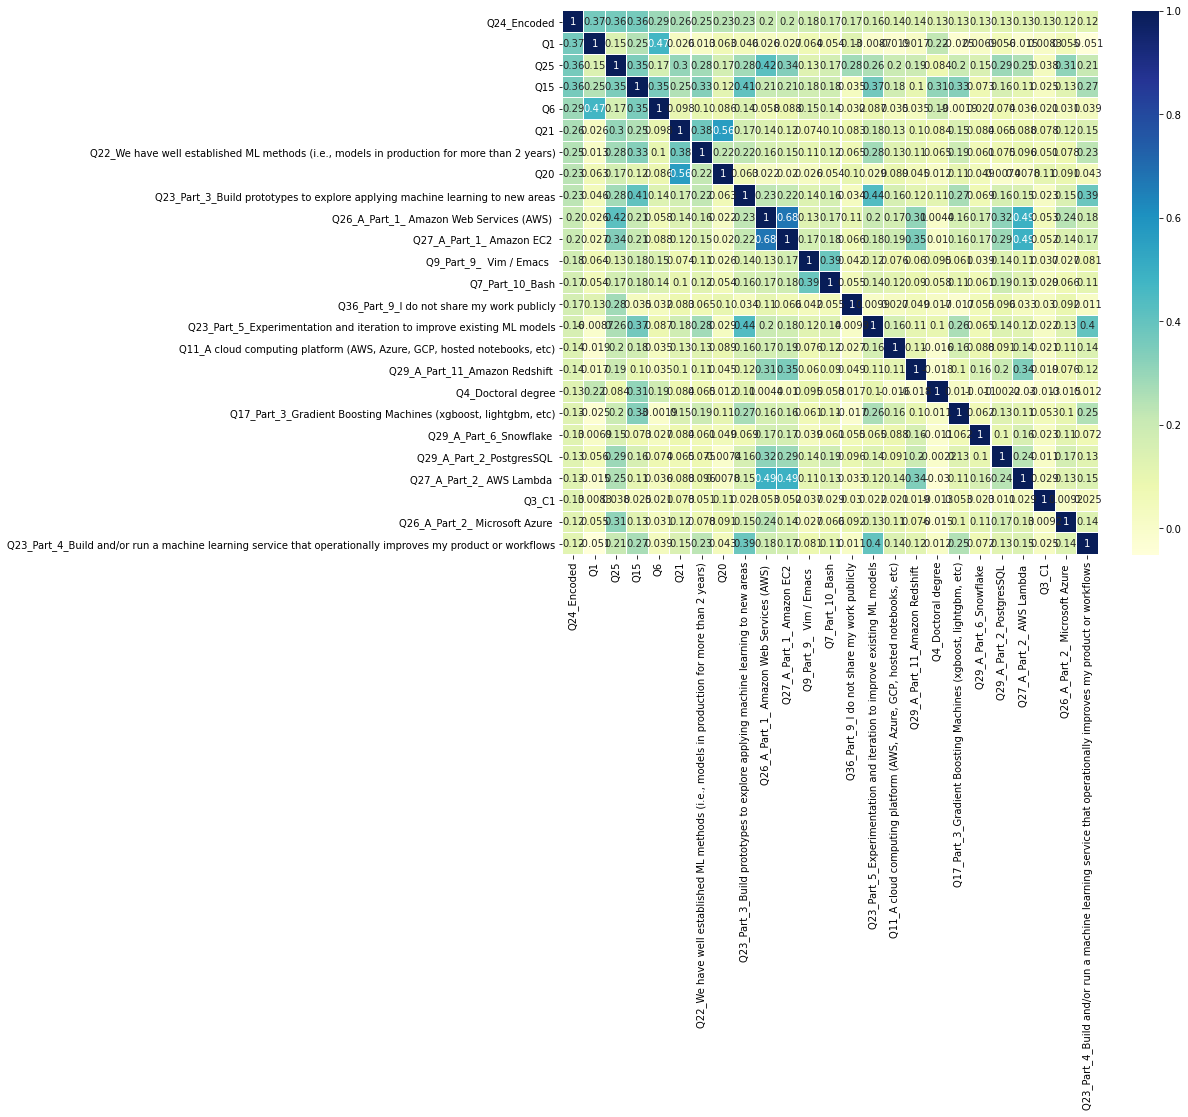

In [51]:
corr = kaggle_df.corr()
  
cols = corr.nlargest(25, 'Q24_Encoded')['Q24_Encoded'].index 
  
cm = np.corrcoef(kaggle_df[cols].values.T) 
f, ax = plt.subplots(figsize =(12, 10)) 
  
sns.heatmap(cm, ax = ax, cmap ="YlGnBu", annot=True,
            linewidths = 0.1, yticklabels = cols.values,  
                              xticklabels = cols.values) 

**Observation**: The following features are higly correlated with the Q24_Encoded. 
Note that correlation methods mainly works for the label encoded features. 
<br>
The relevant correlated columns are:
* Q1 - Age group
* Q25 - money spent on coding
* Q15 - ML experience
* Q6 - Coding experience
* Q21 - number of individuals are responsible for data science workloads at your place of business



In [52]:
# The Q24_Encoded column is dropped from the dataframe and the x and y dataframe is separated. 
dfx = kaggle_df.drop(columns = ['Q24_Encoded'])
dfy = kaggle_df[['Q24_Encoded']]

### Feature Selection Method 2:
**Random Forest Classifier**: The random forest is a model made up of many decision trees. It does not simply average the predicition of trees (which we could call a “forest”), this model uses two key concepts that gives it the name random:
<br>
* Random sampling of training data points when building trees
* Random subsets of features considered when splitting nodes

<br>
https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

In [53]:
classifier = SelectFromModel(RandomForestClassifier(random_state=42))
classifier.fit(dfx, dfy)
classifier.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False, False,  True, False, False, False,
       False, False, False, False,  True, False,  True,  True,  True,
        True,  True, False, False, False, False, False,  True,  True,
        True,  True, False, False,  True,  True, False, False, False,
       False, False, False,  True,  True,  True,  True, False,  True,
        True, False,  True, False,  True,  True,  True,  True, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True, False,
       False,  True,

In [54]:
selected_features= dfx.columns[(classifier.get_support())]
len(selected_features)

107

In [55]:
selected_features

Index(['Q1', 'Q6', 'Q13', 'Q15', 'Q20', 'Q21', 'Q25', 'Q7_Part_1_Python',
       'Q7_Part_2_R', 'Q7_Part_3_SQL',
       ...
       'Q22_I do not know', 'Q22_No (we do not use ML methods)',
       'Q22_We are exploring ML methods (and may one day put a model into production)',
       'Q22_We have well established ML methods (i.e., models in production for more than 2 years)',
       'Q22_We recently started using ML methods (i.e., models in production for less than 2 years)',
       'Q22_We use ML methods for generating insights (but do not put working models into production)',
       'Q38_Basic statistical software (Microsoft Excel, Google Sheets, etc.)',
       'Q38_Local development environments (RStudio, JupyterLab, etc.)',
       'Q3_C1', 'Q3_C2'],
      dtype='object', length=107)

In [56]:
slfeatures = selected_features.values.tolist()
print(slfeatures)

['Q1', 'Q6', 'Q13', 'Q15', 'Q20', 'Q21', 'Q25', 'Q7_Part_1_Python', 'Q7_Part_2_R', 'Q7_Part_3_SQL', 'Q7_Part_4_C', 'Q7_Part_5_C++', 'Q7_Part_6_Java', 'Q7_Part_7_Javascript', 'Q7_Part_10_Bash', 'Q9_Part_1_Jupyter (JupyterLab, Jupyter Notebooks, etc) ', 'Q9_Part_2_ RStudio ', 'Q9_Part_3_Visual Studio', 'Q9_Part_4_Visual Studio Code (VSCode)', 'Q9_Part_5_ PyCharm ', 'Q9_Part_6_  Spyder  ', 'Q9_Part_7_  Notepad++  ', 'Q9_Part_8_  Sublime Text  ', 'Q9_Part_9_  Vim / Emacs  ', 'Q10_Part_1_ Kaggle Notebooks', 'Q10_Part_2_Colab Notebooks', 'Q10_Part_5_ Binder / JupyterHub ', 'Q12_Part_1_GPUs', 'Q14_Part_1_ Matplotlib ', 'Q14_Part_2_ Seaborn ', 'Q14_Part_3_ Plotly / Plotly Express ', 'Q14_Part_4_ Ggplot / ggplot2 ', 'Q14_Part_5_ Shiny ', 'Q16_Part_1_  Scikit-learn ', 'Q16_Part_2_  TensorFlow ', 'Q16_Part_3_ Keras ', 'Q16_Part_4_ PyTorch ', 'Q16_Part_7_ Xgboost ', 'Q16_Part_8_ LightGBM ', 'Q17_Part_1_Linear or Logistic Regression', 'Q17_Part_2_Decision Trees or Random Forests', 'Q17_Part_3_Gradi

There are 107 features selected in the step of features selection.
<br>
Therefore, it seems there are many features and need to reduce the dimension of the features selected. 
Thus, PCA and scaling is performed in further steps

## PCA and Scaling

<br>

**PCA**: PCA is effected by scale so you need to scale the features in your data before applying PCA. Using StandardScaler from scikit-learn library to standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.
<br>
PCA is mainly used to reducee the dimension of dataset and spped up the machine learning algorithm. 
<br>
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [57]:
from sklearn.preprocessing import StandardScaler
features = selected_features           # using the features selected by random forest classifier
# Separating out the features
x = dfx.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90,random_state=0)

Xn = pca.fit_transform(x)

In [59]:
Xn = pd.DataFrame(Xn)
Xn.shape

(10729, 77)

In [60]:
Yn = pd.DataFrame(dfy)
Yn.shape

(10729, 1)

## Model Implementation

Implementing ordinal logistic regression model on the training set separated before. 

In [61]:
model = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(Xn, Yn, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7510, 77) (7510, 1)
(3219, 77) (3219, 1)


In [62]:
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_train)

accuracy = np.zeros(10)
np_idx = 0

for train_idx, test_idx in kfold.split(X_train):
    X_train1, X_test1 = X_train.values[train_idx], X_train.values[test_idx]
    y_train1, y_test1 = y_train.values[train_idx], y_train.values[test_idx]
    
    X_train1 = scaler.fit_transform(X_train1)
    X_test1 = scaler.transform(X_test1)
    
    model.fit(X_train1, y_train1)
    
    predictions = model.predict(X_test1)
    prediction_prob = model.predict_proba(X_test1)
    
    ACC = accuracy_score(predictions,y_test1)
    accuracy[np_idx] = ACC*100
    np_idx += 1
    print (ACC)
   

print ("Average Score/mean: {}%({}%)".format(round(np.mean(accuracy),3),(round(np.std(accuracy),3))))

0.43142476697736354
0.40745672436750996
0.4380825565912117
0.4047936085219707
0.4167776298268975
0.4167776298268975
0.4194407456724368
0.42876165113182424
0.4167776298268975
0.4474034620505992
Average Score/mean: 42.277%(1.276%)


In [63]:
test_predict= model.predict(X_test)
accuracy_score(test_predict,y_test)

0.391425908667288

The mean and standard deviation of the accuracy score is 42.277% and 1.276% respectively. 
<br>
Here, the accuracy score is selected as a metric to measure the performance. This is because the analysis will be simple and easy to accomplish. 

<br>
When building a model, we want one that can generalize (low bias), and have similar accuracies across testing sets (low variance). 

KFold Cross Validation is a common method where the training set is split into k equal sizes. Then of the k subsamples, a single sample is used for testing, and the remaining k-1 samples are used for training. This process continues k times, and each time a different sample is used for testing. This results in each sample being tested once. At the end of this we get 10 accuracies for the model and, from this, we can get the average accuracy, and the standard deviation of the accuracy. The higher the average accuracy, the lower the bias. The lower the standard deviation, the lower the variance. This better represents the true performance of the model on the training set.

<module 'matplotlib.pyplot' from '/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/matplotlib/pyplot.py'>

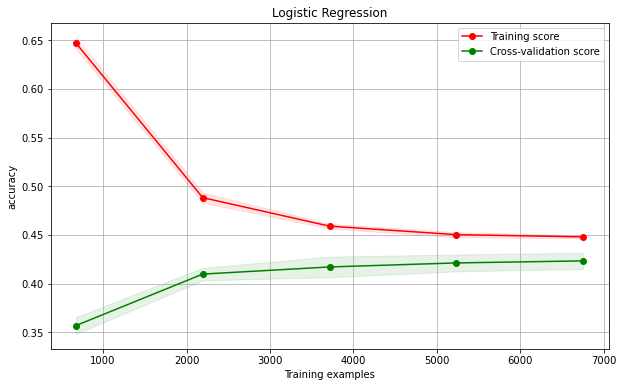

In [64]:
plot_learning_curve(model,'Logistic Regression', X_train, y_train, cv=10)

**Bias Variance Trade off**:

The above learning curve was plotted to check whether the model has high bias or high variance. 

## Hyperparameter tuning with grid search

The hyperparameters for the model is listed below:
* penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}
* C, default=1.0 :Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
* solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=‘lbfgs’ :Algorithm to use in the optimization problem.
* intercept_scalingfloat, default=1
* class_weightdict or ‘balanced’, default=None
* random_stateint, RandomState instance, default=None

These are some hyperparameters that can be tuned for study purpose. 
<br>
In this study, the parameter C and solver is varied as shown in the Raw block below. 
<br>
<br>
The following block for parameter tuning is run and the result is found. Then, the block is converted to Raw type. 

Implementing new optimal model

<br>
The following block will implement the new parameters to the training set of the model. 

In [65]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

model = LogisticRegression(C=0.01, solver='sag')
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_train)

accuracy = np.zeros(10)
np_idx = 0

for train_idx, test_idx in kfold.split(X_train):
    X_train1, X_test1 = X_train.values[train_idx], X_train.values[test_idx]
    y_train1, y_test1 = y_train.values[train_idx], y_train.values[test_idx]
    
    X_train1 = scaler.fit_transform(X_train1)
    X_test1 = scaler.transform(X_test1)
    
    model.fit(X_train1, y_train1)
    
    predictions = model.predict(X_test1)
    prediction_prob1 = model.predict_proba(X_test1)
    
    ACC = accuracy_score(predictions,y_test1)
    accuracy[np_idx] = ACC*100
    np_idx += 1
    
    print (ACC)
   

print ("Average Score/mean: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))

0.4420772303595206
0.41544607190412786
0.43142476697736354
0.4047936085219707
0.4207723035952064
0.43009320905459386
0.42609853528628494
0.4340878828229028
0.42609853528628494
0.4434087882822903
Average Score/mean: 42.743%(1.114%)


In [66]:
test_predict= model.predict(X_test)
accuracy_score(test_predict,y_test)

0.40478409443926683

**Observation**: The average score with the optimized parameters is 42.743% while that for the original one is 42.277%. Therefore, the score is improved slightly.
<br>
Whereas, the standard deviation is slightly lowered to the value of 1.114% from the value of 1.276%. 

<module 'matplotlib.pyplot' from '/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/matplotlib/pyplot.py'>

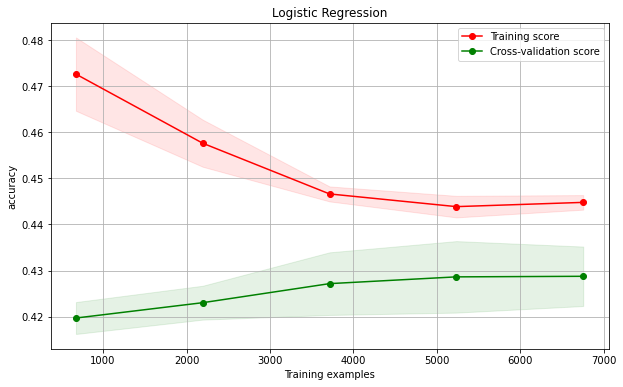

In [67]:
plot_learning_curve(model,'Logistic Regression', X_train, y_train, cv=10)

### Optimal model with xtest

Now the model is run for the testing dataset to see the output performance of the model. 

In [68]:
model = LogisticRegression(C=0.01, solver='sag')
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_test)

accuracy = np.zeros(10)
np_idx = 0

for train_idx, test_idx in kfold.split(X_test):
    X_train1, X_test1 = X_train.values[train_idx], X_train.values[test_idx]
    y_train1, y_test1 = y_train.values[train_idx], y_train.values[test_idx]
    
    X_train1 = scaler.fit_transform(X_train1)
    X_test1 = scaler.transform(X_test1)
    
    model.fit(X_train1, y_train1)
    
    predictions = model.predict(X_test1)
    prediction_prob2 = model.predict_proba(X_test1)
    
    ACC = accuracy_score(predictions,y_test1)
    accuracy[np_idx] = ACC*100
    np_idx += 1
    
    print (ACC)
   

print ("Average Score/mean: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))

0.4503105590062112
0.40993788819875776
0.43167701863354035
0.3695652173913043
0.4254658385093168
0.4472049689440994
0.4161490683229814
0.40372670807453415
0.40993788819875776
0.3925233644859813
Average Score/mean: 41.565%(2.327%)


## Testing and Discussion:

The model does not look overfitting or underfitting. It is a good fit. The test data score was around 41.565% while that of train data score is 42.743%. This is because of the ratio for training and testing dataset split. If more features are included then the accuracy can be increased. The probability of training and testing set was been plotted with respect to the salary

In [69]:
print(prediction_prob)
print(prediction_prob1)

[[0.1060254  0.0731801  0.07344407 ... 0.04526051 0.01879255 0.02896621]
 [0.17778661 0.16413933 0.1630776  ... 0.01758905 0.00225849 0.00296225]
 [0.18348275 0.20670725 0.11203677 ... 0.01008983 0.00202845 0.00769276]
 ...
 [0.03202061 0.05923028 0.05926194 ... 0.13817988 0.01036864 0.03957216]
 [0.17937954 0.20475789 0.04710881 ... 0.03001754 0.01412644 0.00498171]
 [0.35403341 0.14073924 0.05532429 ... 0.00364104 0.00119275 0.00386412]]
[[0.14134391 0.08401826 0.07771126 ... 0.04847339 0.01856671 0.02717593]
 [0.20427477 0.15778232 0.14046208 ... 0.02672031 0.00579981 0.00733136]
 [0.20995527 0.185065   0.09925544 ... 0.02297156 0.00764666 0.01389922]
 ...
 [0.05485318 0.07174313 0.06714375 ... 0.12688866 0.01684764 0.03141113]
 [0.21010422 0.18435205 0.05072987 ... 0.03709195 0.01942869 0.01270885]
 [0.36057881 0.13705048 0.05881052 ... 0.008021   0.00477022 0.00999506]]


In [70]:
columns =  '$0-9,999', '10,000-19,999', '20,000-29,999', '30,000-39,999', '40,000-49,999', '50,000-59,999', '60,000-69,999', '70,000-79,999', '80,000-89,999', '90,000-99,999', '100,000-124,999', '125,000-149,999', '150,000-199,999', '200,000-249,999', '250,000 or more'

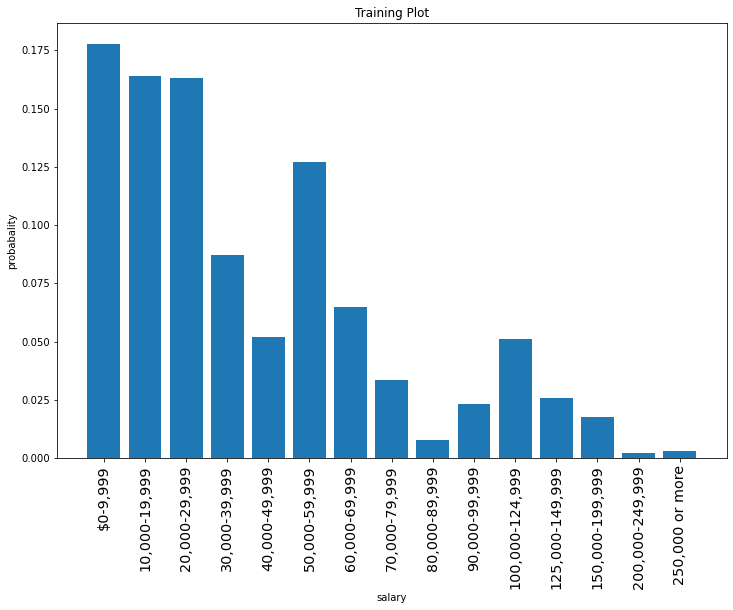

In [71]:

train_plt = pd.DataFrame(prediction_prob, columns = columns)

plt.figure(figsize = (12,8))
plt.bar(columns, train_plt.loc[1])
plt.xlabel('salary')
plt.ylabel('probabality')
plt.xticks(rotation=90,fontsize='x-large')
plt.title('Training Plot')
plt.show()

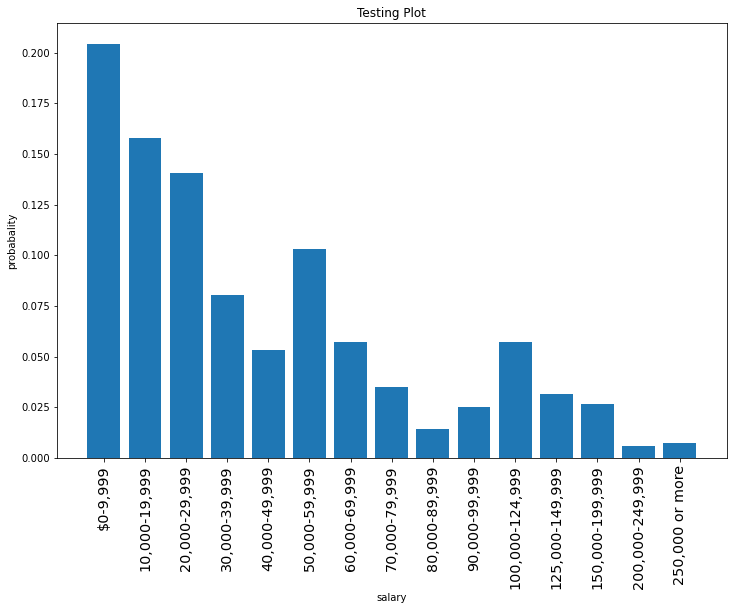

In [72]:
test_plt = pd.DataFrame(prediction_prob1, columns = columns)
plt.figure(figsize = (12,8))
plt.bar(columns, test_plt.loc[1])
plt.xlabel('salary')
plt.ylabel('probabality')
plt.xticks(rotation=90,fontsize='x-large')
plt.title('Testing Plot')
plt.show()